# Test Glaze et al. model implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import default_rng
from scipy.special import logit

from bfdm.tasks import GlazeTask
from bfdm.glazemodel import GlazeAgent, GlazeModel

In [2]:
rng = default_rng(999)

## Create synthetic data

In [3]:
n_trials = 2000
h_true = 0.02
noise_true= 1.0

task = GlazeTask(hazard_rate=h_true, noise=noise_true, rng=rng)
s, x = task.sample_trials(n_trials)

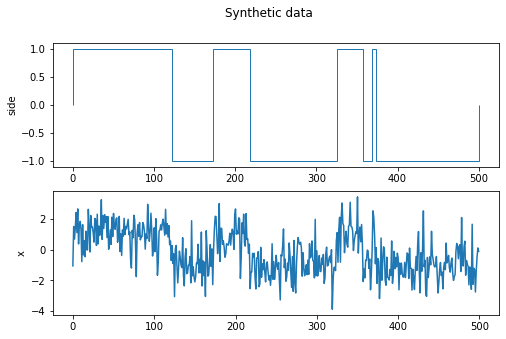

In [4]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(2, 1, figsize=(8, 5))

ax[0].stairs(s[idx])
ax[0].set_ylabel('side')

ax[1].plot(x[idx])
ax[1].set_ylabel('x')

fig.suptitle('Synthetic data');

## Run agent with optimal parameters on data

In [5]:
# Optimal values for bias and weight
w0_true = 0
w1_true = 2 / (noise_true ** 2)

# Create agent with optimal parameters
opt_agent = GlazeAgent(h_true, w0_true, w1_true, rng)

# Choice samples and decision function values
y, r = opt_agent.sample(x, return_r=True)

# Compute error from predictions
err = (s - y) ** 2
win_size = 50
err_smooth = np.convolve(err, np.ones(win_size), 'same') / win_size

### Filter results

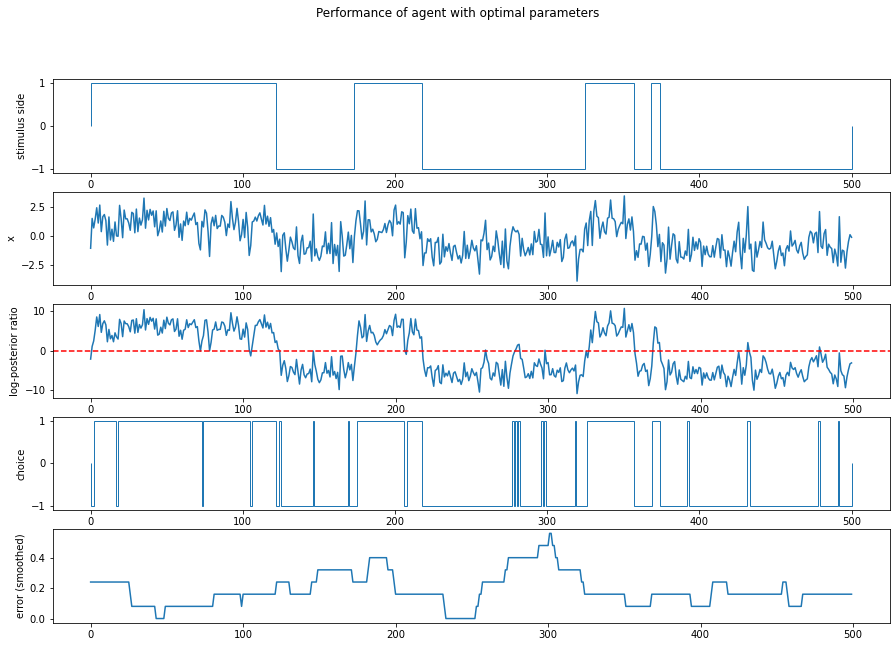

In [6]:
idx = np.s_[0:500]

(fig, ax) = plt.subplots(5, 1, figsize=(15, 10))

ax[0].stairs(s[idx])
ax[0].set_ylabel('stimulus side')

ax[1].plot(x[idx])
ax[1].set_ylabel('x')

ax[2].plot(r[idx])
ax[2].axhline(y=0, color='r', linestyle='--')
ax[2].set_ylabel('log-posterior ratio')

ax[3].stairs(y[idx])
ax[3].set_ylabel('choice')

ax[4].plot(err_smooth[idx])
ax[4].set_ylabel('error (smoothed)')

fig.suptitle('Performance of agent with optimal parameters');

## Recover model parameters from prediction data

In [7]:
# Fit model to preductions from optimal model
model = GlazeModel()
model.fit(x, y)

In [8]:
# Print parameters of fit model
print(f'hazard_rate: {model.h} (opt: {h_true})')
print(f'w_0: {model.w_0} (opt: {w0_true})')
print(f'w_1: {model.w_1} (opt: {w1_true})')

hazard_rate: 0.02315915446628592 (opt: 0.02)
w_0: 0.036181570784456864 (opt: 0)
w_1: 1.6660515691334261 (opt: 2.0)
